# Exercício para sala de aula - Mapas auto-organizáveis

### **Introdução e objetivos:** 
Este notebook é um material complementar a disciplina de Aprendizado de Máquinas 2. O objetivo é reforçar os conteúdos da aula de mapas auto-organizáveis e trazer alguns aspectos práticos da implementação destes modelos. Vamos cobrir as etapas de treinamento, avaliação e utilização do modelo.

Como vimos em sala, os mapas auto-organizáveis podem ser utilizados para visualização de dados, redução de dimensionalidade e compressão (quantização). Neste exercício, vamos utilizar um mapa para visualização e redução de dimensionalidade de dados associados a liberdade econômica.

### **Exercícios**

Exercício 1 - Dimensões dos nossos dados de entrada e saída e definição de hiperparâmetros

Exercício 2 - Treinamento do modelo

Exercício 3 - Utilização do modelo

Exercício 4 - Visualização dos dados/resultados

### Pacotes necessários
Para a execução deste exercício nós vamos precisar instalar o pacote Minisom e modificar a versão instalado do pacote xlrd

In [7]:
# Instalando o pac†ote
#https://github.com/JustGlowing/minisom
!pip install minisom
!pip install xlrd==1.2.0

### Pacotes necessários
Estes são os pacotes necessários. A documentação do algoritmo de mapas auto-organizáveis do Minisom se encontra em: https://github.com/JustGlowing/minisom

In [22]:
# Importando os pacotes necessários
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from minisom import MiniSom   
pd.set_option('display.float_format', lambda x: '%.3f' % x)


### Dataset

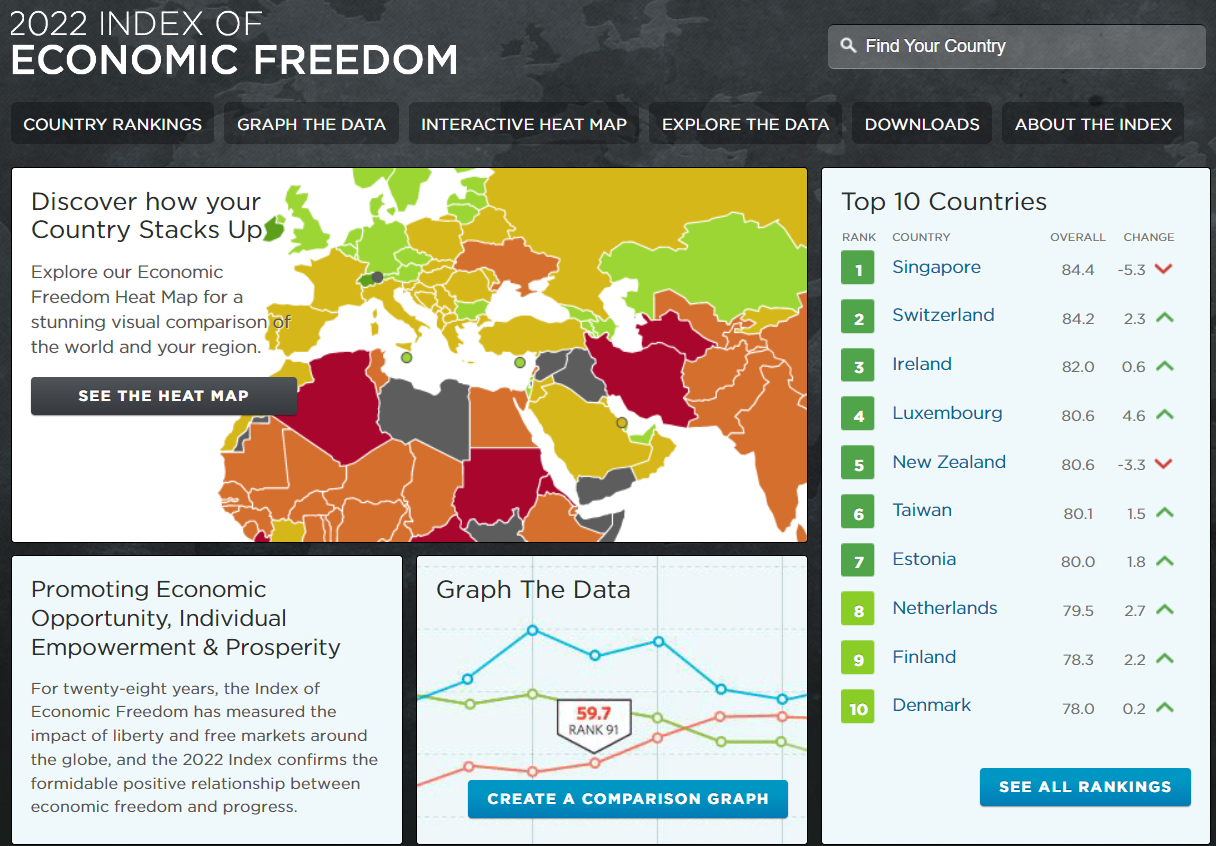

Vamos utilizar o dataset de liberdade econômica criado pelo Heritage Foundation.

O Índice de Liberdade Econômica (Index of Economic Freedom) é uma classificação que avalia o grau de liberdade econômica de 186 países. Criado em 1995 através de uma parceria entre o The Wall Street Journal e o think tank conservador norte-americano conhecido como Heritage Foundation, o índice considera doze categorias de "liberdade econômica": nos negócios; no comércio; liberdade fiscal; de intervenção do governo; monetária; de investimentos; financeira; de corrupção; do trabalho; e direitos de propriedade [8].

Vamos trabalhar com **12 features**. Os países são avaliados em quatro categorias principais, e cada uma contém três subcategorias:
* **Estado de Direito**: Direitos de Propriedade, Integridade de Governo, Eficiência Judicial
* **Tamanho do governo**: Gastos do Governo, Carga Tributária, Saúde Fiscal
* **Eficiência Regulatória**: Liberdade Comercial, Liberdade de Trabalho, Liberdade Monetária
* **Mercados Abertos**: Liberdade de Comércio Exterior, Liberdade de Investimento, Liberdade Financeira.

Todos os critérios têm o mesmo peso no cálculo final do índice, que considera uma **escala de 0 a 100**. Com base nesse resultado, a Heritage divide os países em cinco categorias principais: 
* **Livre** (entre 80 e 100)
* **Majoritariamente livre** (entre 70 a 79,9)
* **Moderadamente livre** (60 a 69,9)
* **Majoritariamente não-livre** (entre 50 a 59,9)
* **Reprimido** (0 a 49,9)
* **Não ranqueado**

In [13]:
import pandas as pd

data = pd.read_csv('index2020_data.csv', index_col=0, sep=';')

print(data.columns)

Index(['Country Name', 'WEBNAME', 'Region', 'World Rank', 'Region Rank',
       '2020 Score', 'Property Rights', 'Judical Effectiveness',
       'Government Integrity', 'Tax Burden', 'Gov't Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom',
       'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)',
       'Tax Burden % of GDP', 'Gov't Expenditure % of .GDP ', 'Country',
       'Population (Millions)', 'GDP (Billions. PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)'],
      dtype='object')


In [49]:
data = data.dropna(subset=['World Rank']).reset_index(drop=True)

In [50]:
data.head()

,Country Name,WEBNAME,Region,World Rank,Region Rank,2020 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,Afghanistan,Afghanistan,Asia-Pacific,136.000,33.000,"54,7","48,3","30,0","24,8","91,4",...,Afghanistan,"36,0","$72,6","2,3","2,2",$2.017,"1,5","0,6","139,2","7,1"
1,Albania,Albania,Europe,57.000,30.000,"66,9","57,1","33,0","38,8","85,9",...,Albania,"2,9","$38,4","4,2","3,1",$13.345,"13,9","2,0","1.293,6","68,6"
2,Algeria,Algeria,Middle East and North Africa,169.000,14.000,"46,9","37,9","35,0","28,3","75,4",...,Algeria,"42,6","$657,5","2,1","2,8",$15.440,"12,2","4,3","1.506,3","36,9"
3,Angola,Angola,Sub-Saharan Africa,154.000,35.000,"52,2","36,9","14,3","15,1","87,3",...,Angola,"29,3","$199,3","-1,7","0,3",$6.814,"7,3","19,6","-5.732,5","88,1"
4,Argentina,Argentina,Americas,149.000,26.000,"53,1","50,5","47,0","49,7","69,6",...,Argentina,"44,6","$915,1","-2,5","-0,3",$20.537,"9,5","34,3","12.161,8","86,3"


In [52]:
data.drop(columns=['Country']).columns

Index(['Country Name', 'WEBNAME', 'Region', 'World Rank', 'Region Rank',
       '2020 Score', 'Property Rights', 'Judical Effectiveness',
       'Government Integrity', 'Tax Burden', 'Gov't Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom',
       'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)',
       'Tax Burden % of GDP', 'Gov't Expenditure % of GDP ',
       'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)'],
      dtype='object')

In [53]:
# Retirando as features descritivas e selecionando aquelas que vamos utilizar para o treinamento do mapa auto-organizável
features = ['Property Rights','Judical Effectiveness',
       'Government Integrity', 'Tax Burden', "Gov't Spending", 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom']
data_train = data[features].values.tolist()

In [54]:
data_train

[['48,3',
  '30,0',
  '24,8',
  '91,4',
  '79,2',
  '99,9',
  '54,7',
  '61,6',
  '81',
  '66,0',
  10.0,
  10.0],
 ['57,1',
  '33,0',
  '38,8',
  '85,9',
  '74,6',
  '86,3',
  '65,7',
  '52,1',
  '81,2',
  '88,4',
  70.0,
  70.0],
 ['37,9',
  '35,0',
  '28,3',
  '75,4',
  '52,6',
  '17,3',
  '63,0',
  '50,5',
  '76,2',
  '66,2',
  30.0,
  30.0],
 ['36,9',
  '14,3',
  '15,1',
  '87,3',
  '85,7',
  '71,9',
  '57,7',
  '61,1',
  '59,6',
  '66,2',
  30.0,
  40.0],
 ['50,5',
  '47,0',
  '49,7',
  '69,6',
  '50,7',
  '24,7',
  '60,2',
  '46,5',
  '53,7',
  '69,2',
  55.0,
  60.0],
 ['60,7',
  '54,1',
  '43,4',
  '84,9',
  '80,6',
  '68,8',
  '81,0',
  '72,5',
  '76,0',
  '80,6',
  75.0,
  70.0],
 ['82,8',
  '86,1',
  '89,3',
  '63,0',
  '61,6',
  '91,8',
  '87,8',
  '84,0',
  '86,2',
  '88,2',
  80.0,
  90.0],
 ['87,3',
  '73,2',
  '84,0',
  '51,3',
  '27,2',
  '87,9',
  '73,0',
  '68,3',
  '81,0',
  '86,4',
  90.0,
  70.0],
 ['67,1',
  '53,9',
  '38,7',
  '88,0',
  '63,0',
  '99,2',
  '80,

##### Exercício 1 - Hiperparâmetros

Vamos verificar quais as dimensões dos nossos dados de entrada e saída? Quais os hiperparâmetros devemos definir para o treinamento deste modelo? 

In [ ]:
# Instanciando o algoritmo
grid_width = 'A DEFINIR'
grid_height = 'A DEFINIR'

sofm = MiniSom(
    x = grid_width,
    y = grid_height',
    learning_rate='A DEFINIR'
)

#### Exercício 2

O objetivo deste exercício é verificar como o número de iterações influência no treinamento do modelo. Além disso, é interessante verificar como os hiperparâmetros podem ser modificados e o impacto deles no resultado.

Faça outros experimentos com o número de neurônios diferente. Lembre-se que quanto maior o número de neurônios, maior a capacidade de representação.

In [ ]:
# Executando o treinamento
sofm.train('A DEFINIR')

Avaliação do modelo. Para o escopo deste exercício o avaliação pode ser feita de forma qualitativa.

In [ ]:
# Verificando os pesos dos primeiros neurônios
sofm.get_weights()

#### Exercício 3 - Utilização do modelo

Vamos visualizar em qual neurônio cada país foi mapeado. A função predict nos retorna o número do neurônio associado a um determinado vetor (ou padrão de entrada). Com isso, conseguimos verificar quais países estão associados à um determinado neurônio.

Podemos analisar também quão bem um determinado neurônio foi representado, comparando o vetor de pesos do neurônio e o padrão de entrada da rede.

Faça o predict para um subconjunto de países e verifique os neurônios aos quais ele foi mapeado.

In [ ]:
countries = ['A DEFINIR']

# Selecionando as features (padrão de entrada dos países escolhidos acima)
list_country = []
for item in countries:
    country_data = data[features][data['Country Name']==item].values
    if len(country_data) > 0:
        list_country.append(sofm.winner(country_data[0]))

print(list_country)
for i, val in enumerate(list_country):
    print(f'{countries[i]} -> neuron number: {str(list_country[i])}')

Quão bem um determinado país foi representado? Verifique os dados de entrada e os pesos associados ao neurônio correspondente

Quais países foram atribuídos à um mesmo neurônio?

#### Exercício 4 - Visualização dos dados/resultados

A visualização dos dados pode ser feita em um grid bidimensional, independente das dimensões dos dados de entrada. Neste caso, os dados de entrada para treinamento do modelo tem 12 dimensões (12 features selecionadas no dataset). 

Quais observações vocês podem fazer com relação aos dados apresentados no gráfico? Alterariam algum hiperparâmetro? Por que?